In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataset = pd.read_csv("/content/Crop_recommendation.csv")
dataset.nunique()

X = dataset.drop(columns=['label'])
y = dataset['label']

In [ ]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
X = X.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()  # Define your scaler object here
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)




In [ ]:
# categorical_columns = ['Sowing Time', 'Region', 'Soil Type']
# for column in categorical_columns:
#     X[column] = LabelEncoder().fit_transform(X[column])

In [ ]:
# X = pd.get_dummies(X, columns=categorical_columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#encoding labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=X_train_scaled.shape[1]))

In [ ]:
model.add(Dense(units=len(y.unique()), kernel_initializer='uniform', activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled, y_train, batch_size=5, epochs=100)

Epoch 1/100
352/352 [==============================] - 2s 3ms/step - loss: 3.0644 - accuracy: 0.0858
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 2.8905 - accuracy: 0.1801
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 2.6306 - accuracy: 0.3267
Epoch 4/100
352/352 [==============================] - 1s 4ms/step - loss: 2.3793 - accuracy: 0.4233
Epoch 5/100
352/352 [==============================] - 1s 3ms/step - loss: 2.1544 - accuracy: 0.5097
Epoch 6/100
352/352 [==============================] - 1s 3ms/step - loss: 1.9580 - accuracy: 0.5847
Epoch 7/100
352/352 [==============================] - 1s 3ms/step - loss: 1.7907 - accuracy: 0.6409
Epoch 8/100
352/352 [==============================] - 1s 3ms/step - loss: 1.6498 - accuracy: 0.6426
Epoch 9/100
352/352 [==============================] - 1s 3ms/step - loss: 1.5290 - accuracy: 0.6960
Epoch 10/100
352/352 [==============================] - 1s 3ms/step - loss: 1.4238 - accura

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # # Train the model with early stopping
# model.fit(X_train_scaled, y_train, batch_size=10, epochs=150, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])


In [ ]:
y_pred = model.predict(X_test_scaled)

14/14 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Predict classes for X_test_scaled
y_pred_classes = model.predict(X_test_scaled)
# Convert probabilities to class labels
y_pred_classes = y_pred_classes.argmax(axis=-1)

14/14 [==============================] - 0s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 89.09%


In [ ]:
y_pred

array([[2.7399818e-19, 2.1829907e-09, 3.3460572e-07, ..., 5.4756790e-09,
        8.0777121e-12, 3.6630780e-02],
       [1.1934822e-15, 5.7359603e-07, 8.1908438e-06, ..., 8.7777971e-07,
        1.0450782e-07, 9.0868801e-01],
       [7.2534910e-08, 5.5909751e-04, 1.2352440e-03, ..., 9.5690863e-04,
        2.6242958e-08, 1.0823529e-06],
       ...,
       [2.9180694e-23, 1.2240722e-06, 1.7181438e-07, ..., 1.4626706e-15,
        3.5132050e-11, 8.3775824e-04],
       [2.3102379e-20, 2.4233213e-05, 2.1653689e-06, ..., 5.9546748e-14,
        3.3895214e-10, 5.4139650e-04],
       [5.3647044e-04, 2.7484971e-03, 2.4812030e-05, ..., 2.3793380e-08,
        3.4728003e-09, 3.4460882e-14]], dtype=float32)

In [ ]:
import numpy as np

# Assuming y_pred is your array
predicted_classes = np.argmax(y_pred, axis=1)

# If you have used LabelEncoder during preprocessing
predicted_crop_names = label_encoder.inverse_transform(predicted_classes)


In [ ]:
print(predicted_crop_names)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'cotton' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'mothbeans' 'rice' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'lentil' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'lentil' 'watermelon' 'coconut' 'mothbeans'
 'orange' 'mungbean' 'mango' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'jute' 'banana' 'blackgram' 'papaya' 'banana'
 'cotton' 'watermelon' 'orange' 'jute' 'chickpea' 'jute' 'mothbeans'
 'orange' 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeonpeas' 'blackgram' 'kidneybeans'
 'coffee

In [ ]:
# input_parameters = {
#     'Sowing Time': 'june',
#     'Region': 'andhra pradesh',
#     'Soil Type': 'black cotton soil',
#     'Min Temp': 20,
#     'Max Temp': 30,
#     'Soil pH': 6.5,
#     'Min Rainfall': 25,
#     'Max Rainfall': 60
# }

# input_df = pd.DataFrame([input_parameters])
# input_df_aligned = pd.get_dummies(input_df, columns=categorical_columns)
# input_df_aligned = input_df_aligned.reindex(columns=X.columns, fill_value=0)
# input_scaled = scaler.transform(input_df_aligned.values)
# predicted_crop_index = model.predict(input_scaled).argmax(axis=-1)
# predicted_crop = label_encoder.inverse_transform(predicted_crop_index)[0]

# print("Predicted Crop:", predicted_crop)

In [ ]:
import pandas as pd

# Assuming you have already defined your input parameters dictionary and trained scaler object

input_parameters = {
    'N': 85,
    'P': 85,
    'K': 85,
    'temperature': 30,
    'humidity': 85,
    'ph': 6.5,
    'rainfall': 200,
}

# Convert the input parameters dictionary to a DataFrame
input_df = pd.DataFrame([input_parameters])

# Scale the numeric columns using the scaler object
input_scaled = scaler.transform(input_df)

# Make predictions using your model
predicted_crop_index = model.predict(input_scaled).argmax(axis=-1)
predicted_crop = label_encoder.inverse_transform(predicted_crop_index)[0]

print("Predicted Crop:", predicted_crop)


1/1 [==============================] - 0s 20ms/step
Predicted Crop: pigeonpeas


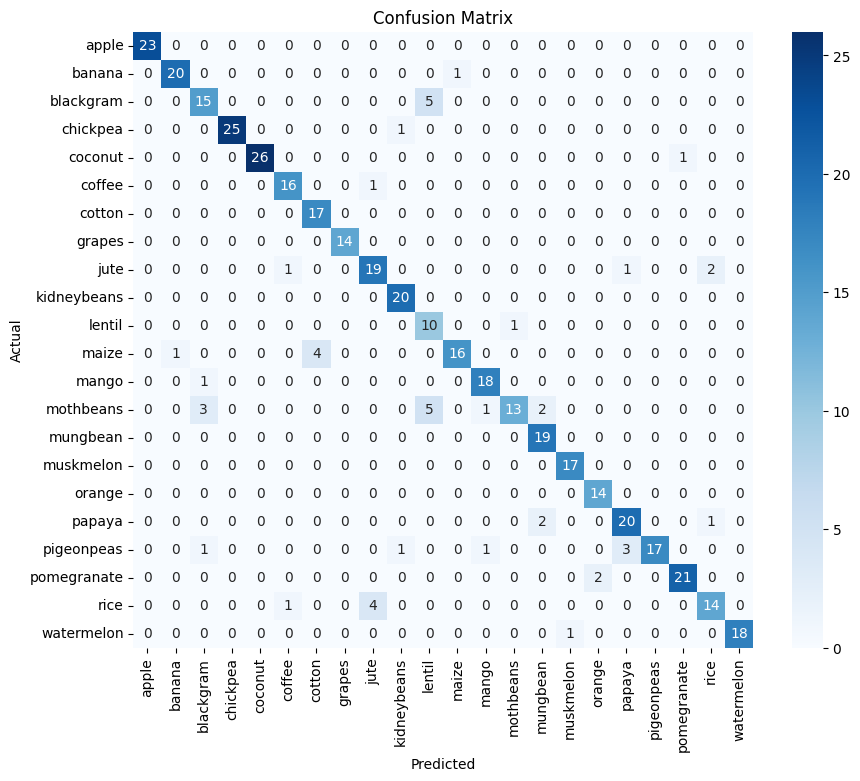

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test_encoded and y_pred_classes are already defined in your code
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_crop_names)
print("Accuracy:", accuracy * 100)

# Calculate F1 score, precision, recall (for multiclass)
f1score = f1_score(y_test, predicted_crop_names, average='weighted')
precision = precision_score(y_test, predicted_crop_names, average='weighted')
recall = recall_score(y_test, predicted_crop_names, average='weighted')

# Create a DataFrame to display metrics in a table
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [accuracy, f1score, precision, recall]
})

print("ANN Algorithm:")
print(metrics_table)

Accuracy: 89.0909090909091
ANN Algorithm:
      Metric     Score
0   Accuracy  0.890909
1   F1 Score  0.890329
2  Precision  0.903825
3     Recall  0.890909


In [ ]:
# Accuracy: 87.95454545454545
# PART Algorithm:
#       Metric     Score
# 0   Accuracy  0.879545
# 1   F1 Score  0.878995
# 2  Precision  0.888469
# 3     Recall  0.879545

In [ ]:
import pickle

# Save the model to a pickle file
with open('ANN_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved to 'ANN_model.pkl'")


Model saved to 'ANN_model.pkl'


In [ ]:
# Load the model from the pickle file
with open('/content/ANN_model.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

print("Model loaded from '/content/Crop_recommendation.csv'")

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)
print("Predictions:", predictions)


Model loaded from '/content/Crop_recommendation.csv'
14/14 [==============================] - 0s 2ms/step
Predictions: [[0.         0.         0.         ... 0.         0.99999994 0.        ]
 [0.         0.         0.         ... 0.         0.99999994 0.        ]
 [0.         0.         0.         ... 0.         0.99999994 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.99999994 0.        ]]


In [ ]:
# Load the model from the pickle file
with open('/content/ANN_model.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

print("Model loaded from '/content/Crop_recommendation.csv'")
N = input("Enter the value of N: ")
P = input("Enter the value of P: ")
K = input("Enter the value of K: ")
temperature = input("Enter the value of temperature: ")
humidity = input("Enter the value of humidity: ")
ph = input("Enter the value of ph: ")
rainfall = input("Enter the value of rainfall: ")


data = {
    'N': [float(N)],
    'P': [float(P)],
    'K': [float(K)],
    'temperature': [float(temperature)],
    'humidity': [float(humidity)],
    'ph': [float(ph)],
    'rainfall': [float(rainfall)],
}
df = pd.DataFrame(data)

# Scale the numeric columns using the scaler object
input_scaled = scaler.transform(df)

# Make predictions using your model
predicted_crop_index = model.predict(input_scaled).argmax(axis=-1)
predicted_crop = label_encoder.inverse_transform(predicted_crop_index)[0]

print("Predicted Crop:", predicted_crop)


Model loaded from '/content/Crop_recommendation.csv'
Enter the value of N: 101
Enter the value of P: 17
Enter the value of K: 47
Enter the value of temperature: 29.494014
Enter the value of humidity: 94.729813
Enter the value of ph: 6.185053
Enter the value of rainfall: 26.308209
1/1 [==============================] - 0s 21ms/step
Predicted Crop: muskmelon
